In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import scipy.stats as stats

In [4]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.rename({'DEATH_EVENT':'death'},axis=1,inplace=True)
df.death.value_counts()

0    203
1     96
Name: death, dtype: int64

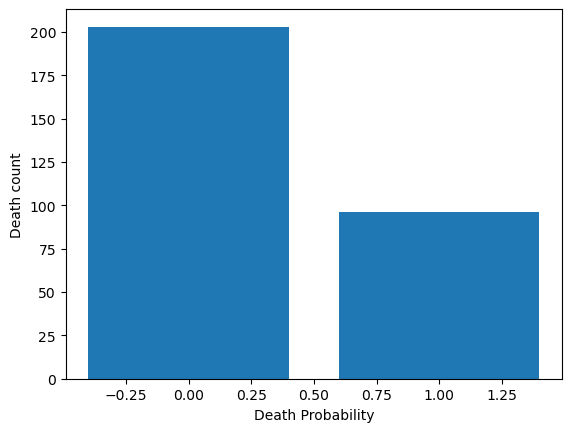

In [5]:
plt.bar(df.death.value_counts().keys(),df.death.value_counts())
plt.xlabel('Death Probability')
plt.ylabel('Death count')
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler


mm=MinMaxScaler()
df['platelets']=mm.fit_transform(df[['platelets']])
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,0.290823,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,0.288833,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,0.165960,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,0.224148,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,0.365984,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,0.157474,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,0.296884,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,0.869075,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,0.139290,1.4,140,1,1,280,0


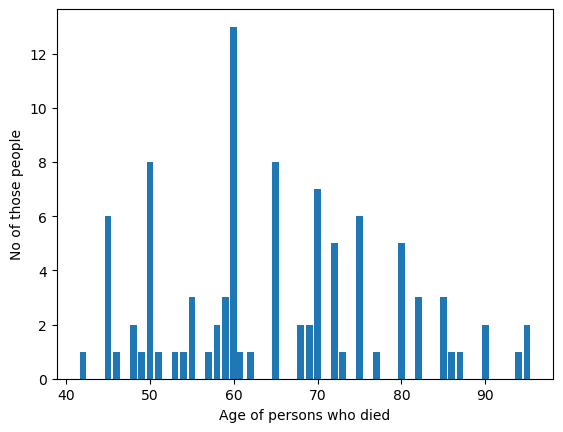

In [7]:
plt.bar(df[df['death']==1].age.value_counts().keys(),df[df['death']==1].age.value_counts())
plt.xlabel('Age of persons who died')
plt.ylabel('No of those people')
plt.show()

In [8]:
died=df[df['death']==1]
died.reset_index(drop=True,inplace=True)
died

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,0.290823,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,0.288833,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,0.165960,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,0.224148,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,0.365984,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,73.0,0,582,0,20,0,0.288833,1.83,134,1,0,198,1
92,60.0,0,166,0,30,0,0.044733,1.70,127,0,0,207,1
93,55.0,0,2017,0,25,0,0.350224,1.10,138,1,0,214,1
94,65.0,1,258,1,25,0,0.209601,1.40,129,1,0,235,1


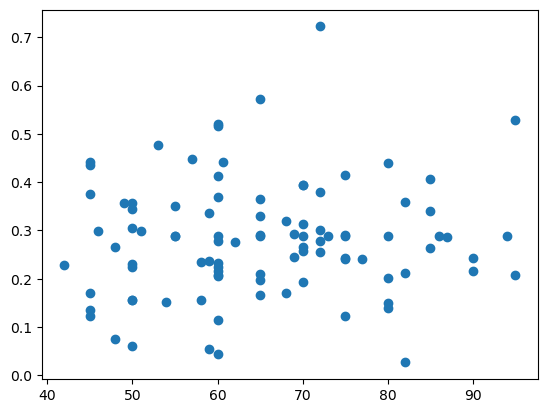

In [9]:
plt.scatter(died['age'],died['platelets'])
plt.show()

In [10]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\rahul\AppData\Local\Temp\ipykernel_7804\3643695028.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
age,1.00,0.09,-0.08,-0.10,0.06,0.09,-0.05,0.16,-0.05,0.07,0.02,-0.22,0.25
anaemia,0.09,1.00,-0.19,-0.01,0.03,0.04,-0.04,0.05,0.04,-0.09,-0.11,-0.14,0.07
creatinine_phosphokinase,-0.08,-0.19,1.00,-0.01,-0.04,-0.07,0.02,-0.02,0.06,0.08,0.00,-0.01,0.06
diabetes,-0.10,-0.01,-0.01,1.00,-0.00,-0.01,0.09,-0.05,-0.09,-0.16,-0.15,0.03,-0.00
ejection_fraction,0.06,0.03,-0.04,-0.00,1.00,0.02,0.07,-0.01,0.18,-0.15,-0.07,0.04,-0.27
high_blood_pressure,0.09,0.04,-0.07,-0.01,0.02,1.00,0.05,-0.00,0.04,-0.10,-0.06,-0.20,0.08
platelets,-0.05,-0.04,0.02,0.09,0.07,0.05,1.00,-0.04,0.06,-0.13,0.03,0.01,-0.05
serum_creatinine,0.16,0.05,-0.02,-0.05,-0.01,-0.00,-0.04,1.00,-0.19,0.01,-0.03,-0.15,0.29
serum_sodium,-0.05,0.04,0.06,-0.09,0.18,0.04,0.06,-0.19,1.00,-0.03,0.00,0.09,-0.20
sex,0.07,-0.09,0.08,-0.16,-0.15,-0.10,-0.13,0.01,-0.03,1.00,0.45,-0.02,-0.00


In [11]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,0.290823,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,0.288833,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,0.165960,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,0.224148,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,0.365984,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,0.157474,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,0.296884,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,0.869075,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,0.139290,1.4,140,1,1,280,0


c:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='creatinine_phosphokinase'>

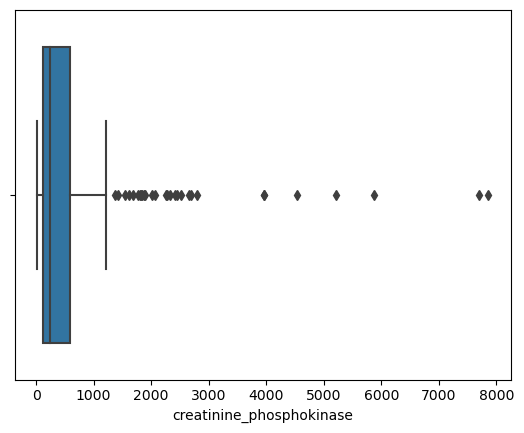

In [12]:
sns.boxplot(df['creatinine_phosphokinase'])

REMOVING OUTLIERS

In [13]:
stats.zscore(df['creatinine_phosphokinase'])

0      0.000166
1      7.514640
2     -0.449939
3     -0.486071
4     -0.435486
         ...   
294   -0.537688
295    1.278215
296    1.525979
297    1.890398
298   -0.398321
Name: creatinine_phosphokinase, Length: 299, dtype: float64

In [14]:
for i in range(10):
    df=df[(stats.zscore(df['creatinine_phosphokinase'],axis=0)<=3) & (stats.zscore(df['creatinine_phosphokinase'],axis=0)>-3)].reset_index(drop=True)
df.shape

(266, 13)

c:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


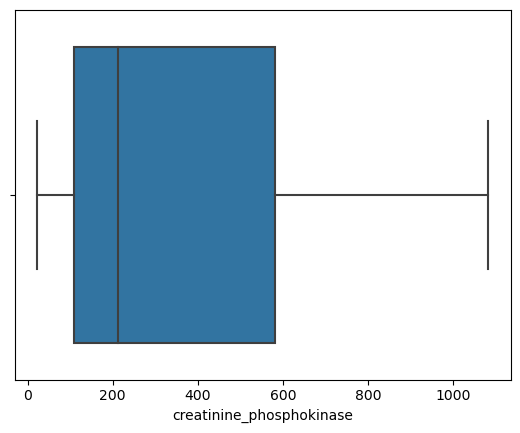

In [15]:
sns.boxplot(df['creatinine_phosphokinase'])
plt.show()

In [16]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,0.290823,1.9,130,1,0,4,1
1,65.0,0,146,0,20,0,0.165960,1.3,129,1,1,7,1
2,50.0,1,111,0,20,0,0.224148,1.9,137,1,0,7,1
3,65.0,1,160,1,20,0,0.365984,2.7,116,0,0,8,1
4,90.0,1,47,0,40,1,0.216875,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,60.0,0,320,0,35,0,0.130804,1.4,139,1,0,258,0
262,52.0,0,190,1,38,0,0.432659,1.0,140,1,1,258,0
263,63.0,1,103,1,35,0,0.186568,0.9,136,1,1,270,0
264,62.0,0,61,1,38,1,0.157474,1.1,143,1,1,270,0


In [17]:
for i in range(5):
    df=df[(stats.zscore(df['ejection_fraction'],axis=0)<=3) & (stats.zscore(df['ejection_fraction'],axis=0)>-3)].reset_index(drop=True)
df.shape

(265, 13)

In [18]:
for i in range(5):
    df=df[(stats.zscore(df['serum_creatinine'],axis=0)<=3) & (stats.zscore(df['serum_creatinine'],axis=0)>-3)].reset_index(drop=True)
    df=df[(stats.zscore(df['serum_sodium'],axis=0)<=3) & (stats.zscore(df['serum_sodium'],axis=0)>-3)].reset_index(drop=True)
df.shape

(236, 13)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
x=df.drop(['death'],axis=1)
y=df['death']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
model_params={
        'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',max_iter=10000),
        'params':{
            'C':[1,5,10,20],
        }
    },
    'random_forest_classifier':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,20,30,40,50,60,70,80,90,100,500,1000],
            'criterion':["gini", "entropy"]
        }
    },
    'gaussian_nb':{
        'model':GaussianNB(),
        'params':{}
    },
    'Multinomial_NB':{
        'model':MultinomialNB(),
        'params':{}
    },
    'decision_tree_classifier':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion' : ["gini", "entropy"]
        }
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[1,2,3,4,5,10,20,30,40,50,100],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    }
}

In [21]:
from sklearn.model_selection import GridSearchCV

clf_rf=GridSearchCV(model_params['random_forest_classifier']['model'],model_params['random_forest_classifier']['params'],cv=10,return_train_score=False)
clf_lr=GridSearchCV(model_params['logistic_regression']['model'],model_params['logistic_regression']['params'],cv=10,return_train_score=False)
clf_g=GridSearchCV(model_params['gaussian_nb']['model'],model_params['gaussian_nb']['params'],cv=10,return_train_score=False)
clf_m=GridSearchCV(model_params['Multinomial_NB']['model'],model_params['Multinomial_NB']['params'],cv=10,return_train_score=False)
clf_dt=GridSearchCV(model_params['decision_tree_classifier']['model'],model_params['decision_tree_classifier']['params'],cv=10,return_train_score=False)
clf_knn=GridSearchCV(model_params['knn']['model'],model_params['knn']['params'],cv=10,return_train_score=False)

In [22]:
clf_rf.fit(x_train,y_train)
clf_lr.fit(x_train,y_train)
clf_g.fit(x_train,y_train)
clf_m.fit(x_train,y_train)
clf_dt.fit(x_train,y_train)
clf_knn.fit(x_train,y_train)

c:\Users\rahul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\rahul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50,
                                         100]})

In [23]:
df_rf=pd.DataFrame(clf_rf.cv_results_)
df_lr=pd.DataFrame(clf_lr.cv_results_)
df_g=pd.DataFrame(clf_g.cv_results_)
df_m=pd.DataFrame(clf_m.cv_results_)
df_dt=pd.DataFrame(clf_dt.cv_results_)
df_knn=pd.DataFrame(clf_knn.cv_results_)

In [24]:
#Summary
scores=[]

for model_name,mp in model_params.items():
    # print(model_name,mp)
    clf=GridSearchCV(mp['model'],mp['params'],cv=10,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_*100,
        'best_params':clf.best_params_
    })
result=pd.DataFrame(scores,columns=['model','best_score','best_params'])   

c:\Users\rahul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\rahul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [25]:
result.sort_values(by=['best_score'],ascending=False,inplace=True)
result.reset_index(drop=True,inplace=True)
result

,model,best_score,best_params
0,random_forest_classifier,89.215686,"{'criterion': 'gini', 'n_estimators': 20}"
1,knn,86.470588,"{'algorithm': 'auto', 'n_neighbors': 5}"
2,logistic_regression,86.372549,{'C': 1}
3,gaussian_nb,84.150327,{}
4,decision_tree_classifier,81.830065,{'criterion': 'entropy'}
5,Multinomial_NB,80.228758,{}
